In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Descriptive statistics and box plots

#### Exercise 4

Buy a 1kg of carrots. There are two options: 1kg of baby carrots or 1kg of regular sized carrots. Can we spot any difference? Which carrots would you buy?

In [2]:
# 6.2-2
data = pd.read_csv("Exercise4.csv")
data.head()

baby  large
0  1.03   1.29
1  1.03   1.10
2  1.06   1.28
3  1.02   1.29
4  1.03   1.23

In [3]:
baby = np.array(data["baby"])
large = np.array(data["large"])

Five numbers summary:
Minimum (Min): 1.02
First quartile (q25): 1.03
Median: 1.04
Third quartile (q75): 1.04
Maximum (Max): 1.06


Measures of centrality:
Mean: 1.039
Median: 1.04
Midrange: 1.04


Measures of spread:
Standard deviation: 0.009
Interquartile Range: 0.01
Range: 0.04



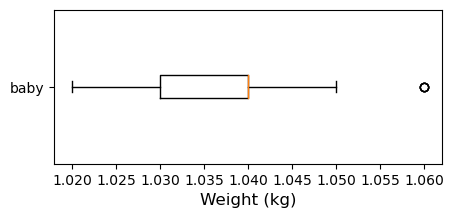

In [4]:
five_b = appst.five_numbers(baby)
centr_b = appst.centralities(baby)
sprea_b = appst.spreads(baby)
plt.figure(figsize = (5,2))
plt.boxplot(baby, vert = False, labels = ["baby"])
plt.xlabel("Weight (kg)", fontsize = 12)
plt.show()
# out_b = appst.boxplot(baby, xlabel="kg", box_label = "baby")

Five numbers summary:
Minimum (Min): 1.0
First quartile (q25): 1.15
Median: 1.21
Third quartile (q75): 1.26
Maximum (Max): 1.43


Measures of centrality:
Mean: 1.206
Median: 1.21
Midrange: 1.215


Measures of spread:
Standard deviation: 0.079
Interquartile Range: 0.11
Range: 0.43



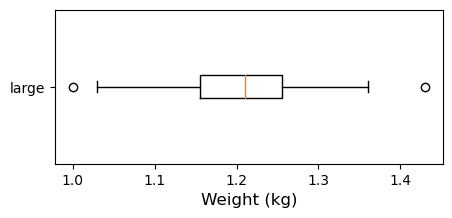

In [5]:
five_l = appst.five_numbers(large)
centr_l = appst.centralities(large)
sprea_l = appst.spreads(large)
plt.figure(figsize = (5,2))
plt.boxplot(large, vert = False, labels = ["large"])
plt.xlabel("Weight (kg)", fontsize = 12)
plt.show()
# out_l = appst.boxplot(large, xlabel="kg", box_label = "large")

In [6]:
# create nice DataFrames
columns = five_b.keys()
index = ["baby", "large"]
values = np.array(list(five_b.values())+list(five_l.values())).reshape(2,-1)
five_df = pd.DataFrame(values, columns = columns, index = index)

In [7]:
five_df

min   q25  median   q75   max
baby   1.02  1.03    1.04  1.04  1.06
large  1.00  1.15    1.21  1.26  1.43

In [8]:
columns = centr_b.keys()
index = ["baby", "large"]
values = np.array(list(centr_b.values())+list(centr_l.values())).reshape(2,-1)
centralities_df = pd.DataFrame(values, columns = columns, index = index)

In [9]:
centralities_df.round(3)

mean  median  midrange
baby   1.039    1.04     1.040
large  1.206    1.21     1.215

In [10]:
columns = sprea_b.keys()
index = ["baby", "large"]
values = np.array(list(sprea_b.values())+list(sprea_l.values())).reshape(2,-1)
spreads_df = pd.DataFrame(values, columns = columns, index = index)

In [11]:
spreads_df.round(3)

std   IQR  range
baby   0.009  0.01   0.04
large  0.079  0.11   0.43

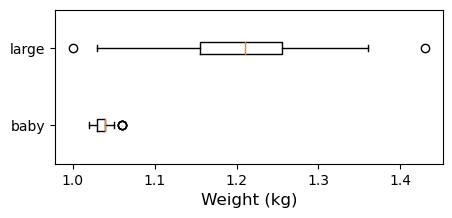

In [12]:
x = [baby,large]
plt.figure(figsize=(5,2))
plt.boxplot(x, vert=False, labels=("baby","large"))
plt.xlabel("Weight (kg)", fontsize = 12)
plt.show()

#### Exercise 5

An insurance company has experienced the following lost in a certain branch (expressed in 10000 USD). How are the losses distributed?

In [13]:
#6.2-4
data = pd.read_csv("Exercise5.csv")
data.head()

losses
0       1
1       2
2       2
3       3
4       3

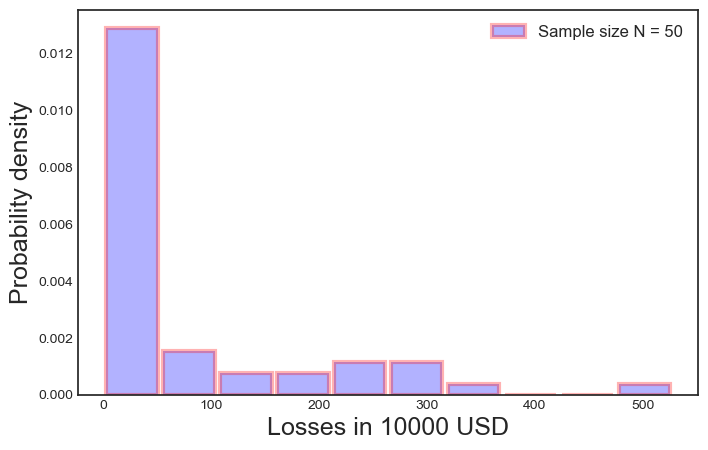

In [14]:
results_histo = appst.density_histogram(X=data, plotfig = True, nbins = 10, \
                                        xlabel = "Losses in 10000 USD", title = "")

Five numbers summary:
Minimum (Min): 1
First quartile (q25): 6.75
Median: 32.0
Third quartile (q75): 90.75
Maximum (Max): 527


Measures of centrality:
Mean: 79.58
Median: 32.0
Midrange: 264.0


Measures of spread:
Standard deviation: 115.459
Interquartile Range: 84.0
Range: 526



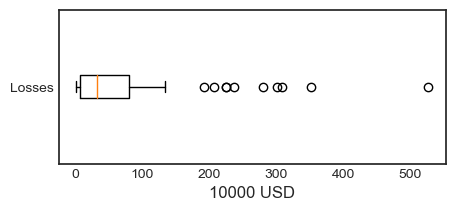

In [15]:
X = np.array(data)
five = appst.five_numbers(X)
centr = appst.centralities(X)
sprea = appst.spreads(X)
plt.figure(figsize = (5,2))
plt.boxplot(X, vert = False, labels = ["Losses"])
plt.xlabel("10000 USD", fontsize = 12)
plt.show()
# out = appst.boxplot(X, box_label="Losses", xlabel = "10000 USD")

In this exercise, we see that the distribution is very skewed to the right.This may be a real effect of the process. Thus, in this case we should be carefull with calling these larger values outliers becuase indeed they probably are not outliers at all.

#### Exercise 6

In 1976 lead concentration in a traffic light in San Diego was measured. Measures have been taken to decrease the amount of lead in the air and in 1977 a new set of 𝑁 = 64 measurements were taken. Did the situation improve?

In [16]:
# 6.2-10
data = pd.read_csv("Exercise6.csv") 
data.head()

1976  1977
0   6.7   9.5
1   5.4  10.7
2   5.2   8.3
3   6.0   9.8
4   8.7   9.1

In [17]:
data.tail()

1976  1977
59   7.3   8.9
60   9.7   6.8
61   9.3   6.6
62   3.2   7.3
63   6.4  16.7

In [18]:
X1 = np.array(data["1976"])
X2 = np.array(data["1977"])

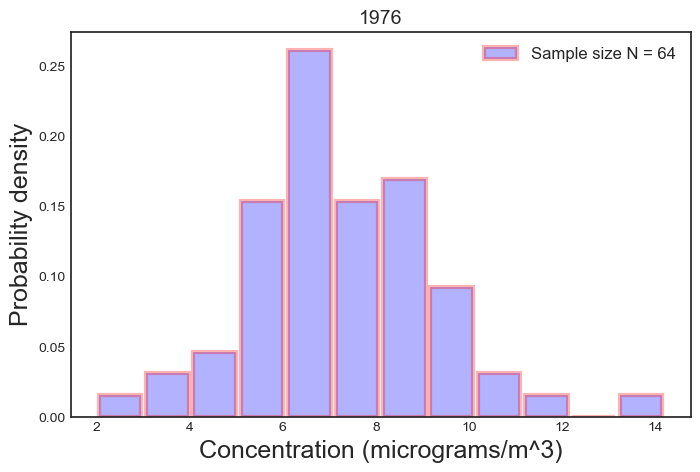

The frequency distribution is: [ 1.  2.  3. 10. 17. 10. 11.  6.  2.  1.  0.  1.]


In [19]:
N_1 = len(X1)
h_results_1 = appst.density_histogram(X1, plotfig=True,nbins = 12, \
                             title='1976', xlabel = "Concentration (micrograms/m^3)")
height, position, width = [h_results_1[i] for i in h_results_1.keys()]
print("The frequency distribution is:", height*width*N_1)

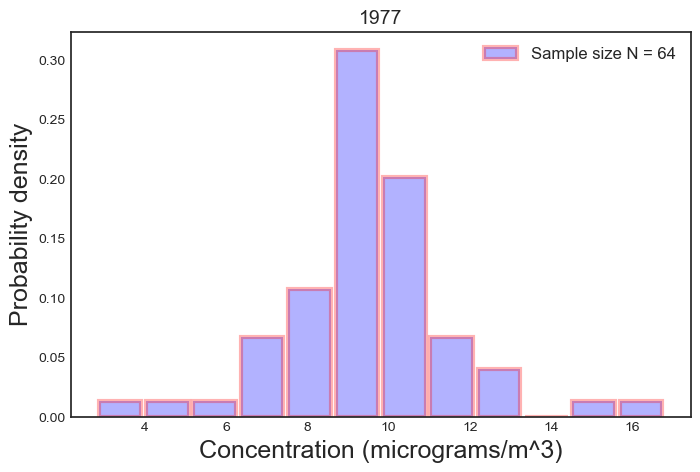

The frequency distribution is: [ 1.  1.  1.  5.  8. 23. 15.  5.  3.  0.  1.  1.]


In [20]:
N_2 = len(X2)
h_results_2 = appst.density_histogram(X2, plotfig=True,nbins = 12, \
                            xlabel = "Concentration (micrograms/m^3)", title='1977')
height, position, width = [h_results_2[i] for i in h_results_2.keys()]
print("The frequency distribution is:", height*width*N_2)

Summary statistics for the year 1976

Five numbers summary:
Minimum (Min): 2.1
First quartile (q25): 6.025
Median: 6.95
Third quartile (q75): 8.475
Maximum (Max): 14.1


Measures of centrality:
Mean: 7.275
Median: 6.95
Midrange: 8.1


Measures of spread:
Standard deviation: 1.967
Interquartile Range: 2.45
Range: 12.0



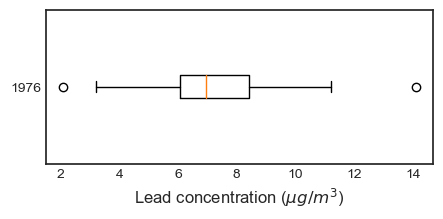

In [21]:
print("Summary statistics for the year 1976")
print()
five_1 = appst.five_numbers(X1)
centr_1 = appst.centralities(X1)
sprea_1 = appst.spreads(X1)
plt.figure(figsize = (5,2))
plt.boxplot(X1, vert = False, labels = ["1976"])
plt.xlabel("Lead concentration ($\mu g/m^3$)", fontsize = 12)
plt.show()
# out_1 = appst.boxplot(X1, box_label="1976", xlabel="Lead concentration ($\mu g/m^3$)")
# for i in out_1.keys():
#     if not(out_1[i] is np.nan):
#         print(i+":", out_1[i])

Summary statistics for the year 1977

Five numbers summary:
Minimum (Min): 2.9
First quartile (q25): 8.625
Median: 9.4
Third quartile (q75): 10.275
Maximum (Max): 16.7


Measures of centrality:
Mean: 9.422
Median: 9.4
Midrange: 9.8


Measures of spread:
Standard deviation: 2.081
Interquartile Range: 1.65
Range: 13.8



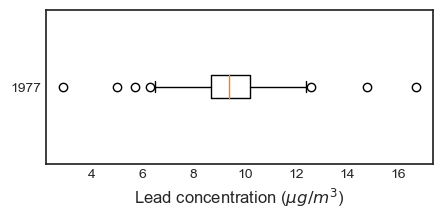

In [22]:
print("Summary statistics for the year 1977")
print()
five_2 = appst.five_numbers(X2)
centr_2 = appst.centralities(X2)
sprea_2 = appst.spreads(X2)
# out_2 = appst.boxplot(X2, box_label="1977", xlabel="Lead concentration ($\mu g/m^3$)")
plt.figure(figsize = (5,2))
plt.boxplot(X2, vert = False, labels = ["1977"])
plt.xlabel("Lead concentration ($\mu g/m^3$)", fontsize = 12)
plt.show()

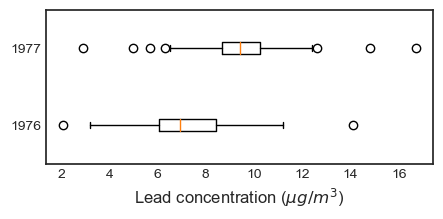

In [23]:
plt.figure(figsize=(5,2))
plt.boxplot([X1,X2], vert=False, labels=("1976","1977")) #,notch=True)
plt.xlabel("Lead concentration ($\mu g/m^3$)", fontsize = 12)
# plt.plot([3,3],[0.9,1.1],':r')
plt.show()

In [24]:
columns = five_1.keys()
index = ["1976", "1977"]
values = np.array(list(five_1.values())+list(five_2.values())).reshape(2,-1)
five_df = pd.DataFrame(values, columns = columns, index = index)

In [25]:
five_df

min    q25  median     q75   max
1976  2.1  6.025    6.95   8.475  14.1
1977  2.9  8.625    9.40  10.275  16.7

In this exercise we have seen that the pollution has increased instaed of decreasing. This was indeed due to higher velocities of the cars in the traffic light. 

## Quantiles and probability plots

Probability plots are mostly used to check if the data is normally distributed. You plot your sample and this gives you an indication that the population is approximately normally distributed. This is important for relatively small sample sizes, because if the population is approximately normally distributed, inference statistics based on normal distribution can be applied.

Let $p$ be the order for which we want to know the quantile $z(p)$ from a standard normal distributions and the quantile $q(p)$ from a normal distribution with mean $\mu$ and variance $\sigma^2$. 

It turns out that the following relation holds

$$
z(p) \, =\, \frac{q(p)-\mu}{\sigma}\, ,
$$

which implies that for any order $p$ we have the linear relationship

$$
q(p) \, =\, \sigma z(p)+\mu\, .
$$

As a consequence, if we have a sample of data and we plot all quantiles $q$ against the corresponding quantiles $z$ we should observe a linear relationship if the sample comes from a normally distributed population.

Practically, we proceed as follows:

From a sample $X = [x_1, x_2,\ldots ,x_N]$ we create the order statistic $Y = [y_1, y_2, \ldots , y_n]$ where $y_1 = \min{(X)}$, $y_2 = \min{\left(X/y_1\right)}$ and so on until $y_n =\max{(X)}$. 

The order statistic is interpreted as the quantiles of order $P = [1/(n+1), 2/(n+1), \ldots , n/(n+1)]$, where $n$ is the sample size.

<div class="alert alert-block alert-success">
<b>Watch out:</b> Many software compute the order differently, based on one algorithm by Filliben (1975). According to this algorithm, the order $p_j$ associated to the j-th observation is given by
$$
p_j \, =\, \frac{j-0.3175}{n + 0.365}
$$
for $j=2,\ldots ,n-1$. And $p_1 = 1- p_n$ with $p_n = (1/2)^{1/n}$.
</div>

As a next step, we associate to each order $p$ the quantile $z(p)$ of the standard normal distribution $\phi(x)$ by inverting

$$
p\, =\, \int_{-\infty}^z \phi(x)dx
$$

by using the command ```z = norm.ppf(p)``` thus generating the quantiles $Z = [z_1, z_2, \ldots , z_n]$ from the standard normal. 

Finally, we produce a scatter plot of $Z$ (on the x-axis) and $Y$ (on the y-axis).

#### Exercise 7

To measure the specific tensile strength of metal filaments their density in 𝑔/〖𝑐𝑚〗^3 has been measured nine times from independent samples

In [26]:
# 6.3-12
data = pd.read_csv("Exercise7.csv")
list(data["Strengths"])

[7.2, 8.9, 9.7, 10.5, 10.9, 11.7, 12.9, 13.9, 15.3]

The ordered values represent automatically the quantiles. In particular, they represents the nine deciles. We want to see, from this sample, if the population follows a normal distribution. 

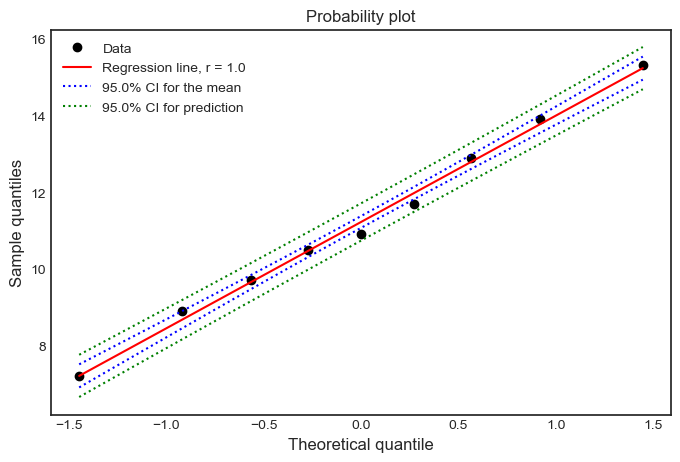

In [27]:
X = np.array(data)
qq_plot = appst.probability_plot(X, verbose = False)

In the above plot, the experimental values (the dots) follow a straight line with the theoretical quantiles of the normal distribution. The very large linear correlation coefficient $r$ indicates that the assumption of normality in the population is very good.

#### Exercise 8

It was interesting to find out if the body length of male and female spiders of Sosippus floridanus is normally distributed. Two samples of independent spiders of nine male and nine female individuals have been collected

In [28]:
#6.3-13
data = pd.read_csv("Exercise8.csv")
data.head()

BL-F   BL-M
0  11.06  12.26
1  13.87  11.66
2  12.93  12.53
3  15.08  13.00
4  17.82  11.79

In [29]:
list(data["BL-F"])

[11.06, 13.87, 12.93, 15.08, 17.82, 14.14, 12.26, 17.82, 20.17]

In [30]:
list(data["BL-M"])

[12.26, 11.66, 12.53, 13.0, 11.79, 12.46, 10.65, 10.39, 12.26]

In [31]:
male = np.array(data["BL-M"])
female = np.array(data["BL-F"])

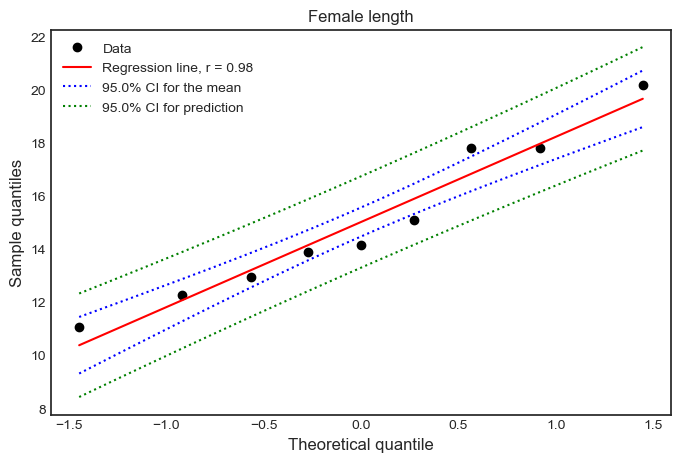

In [32]:
qq_plot_female = appst.probability_plot(X=female, title = "Female length")

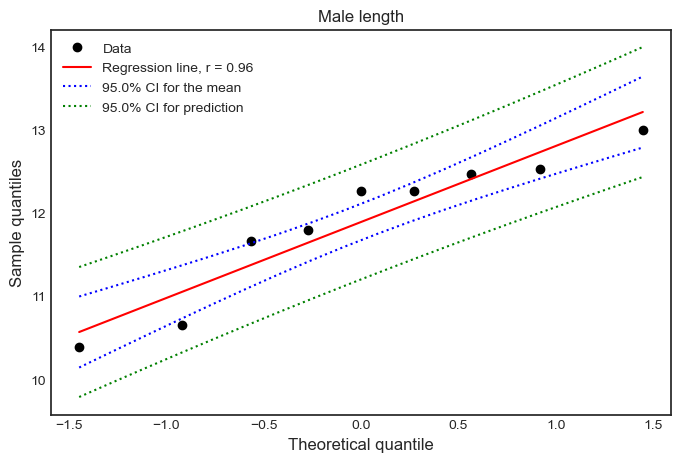

In [33]:
qq_plot_male = appst.probability_plot(X=male, title = "Male length")

Both probability plots indicate a good linear relationship with the quantiles from the normal distribution. The assuption of normality in the population can be taken for good. Note however that very small or very large values, as they would theoretically arise from the normal distribution, have no sense. Thus, the normal distribution is a good approximation within a certain range. 

## Conclusions

From this unit you have learned how to determine several aspects of your data. Together with the histograms, we can characterize the sample by means of five values and their measures of centrality and spreads. The measures of centrality and spread can be also considered as estimates of the population values. 

The box plots help providing a visualisation of the sampled data and their comparison. They also help spotting the presence of potential outliers. 

The quantiles are important statistics of the sample. The order statistics can be used to create probability plots, by means of which we can determine if the population values follow at least approximately (within a certain range of values) a normal distribution.